# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

df = pd.read_csv("/Users/tativalentine/Documents/GitHub/deployment-project/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [169]:
# Check for NaN values (which columns have one)

df.columns[df.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [170]:
# To get a list instead of an Index object

df.columns[df.isnull().any()].tolist()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [171]:
df_clean = df[df.notnull()]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Look at some basic statistics for numerical variables.

In [7]:
columns = df_clean.columns
print(columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [172]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [173]:
df_clean.loc[0:9,"Credit_History"]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: Credit_History, dtype: float64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [174]:
#1.1 How many applicants have a credit history?

df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

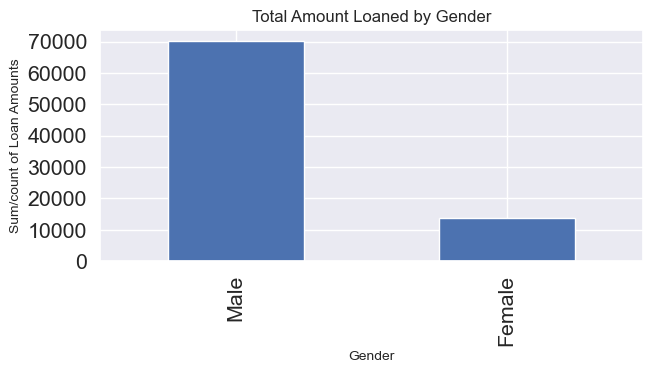

In [175]:
plt.figure(figsize=(7, 3))
df.groupby('Gender').LoanAmount.sum().sort_values(ascending=False).plot.bar() #count()
plt.title('Total Amount Loaned by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Sum/count of Loan Amounts', fontsize=10)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=8)
plt.show()

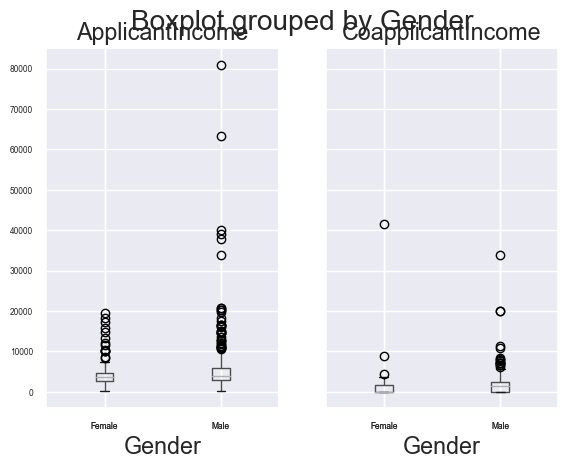

In [178]:
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome'], by='Gender', fontsize=6)

In [12]:
# 1.2 Let's take a look at the ApplicationIncome column

df_clean.loc[0:9,"ApplicantIncome"]

0     5849
1     4583
2     3000
3     2583
4     6000
5     5417
6     2333
7     3036
8     4006
9    12841
Name: ApplicantIncome, dtype: int64

In [13]:
# Let's take a look at the CoapplicantIncome column

df_clean.loc[0:9,"CoapplicantIncome"]

0        0.0
1     1508.0
2        0.0
3     2358.0
4        0.0
5     4196.0
6     1516.0
7     2504.0
8     1526.0
9    10968.0
Name: CoapplicantIncome, dtype: float64

In [14]:
#1.3 Let's compare the mean to the median 

df_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [15]:
# Categorical values: Education, Self_Employed, Married, Gender, Property_Area,	Loan_Status

In [16]:
# Get Unique Count for Education	
count = df_clean.Education.unique().size
print("Unique values Education : "+ str(count))

Unique values Education : 2


In [17]:
# Get Unique Count for Self_Employed
count = df_clean.Self_Employed.unique().size
print("Unique values Self_Employed : "+ str(count))

Unique values Self_Employed : 3


In [18]:
# Get Unique Count for Married
count = df_clean.Married.unique().size
print("Unique values Married : "+ str(count))

Unique values Married : 3


In [19]:
# Get Unique Count for Married
count = df_clean.Married.unique().size
print("Unique values Married : "+ str(count))

Unique values Married : 3


In [20]:
# Get Unique Count for Gender
count = df_clean.Gender.unique().size
print("Unique values Gender : "+ str(count))

Unique values Gender : 3


In [21]:
# Get Unique Count for Property_Area
count = df_clean.Property_Area.unique().size
print("Unique values Property_Area : "+ str(count))

Unique values Property_Area : 3


In [22]:
# Get Unique Count for Loan_Status
count = df_clean.Loan_Status.unique().size
print("Unique values Loan_Status : "+ str(count))

Unique values Loan_Status : 2


In [23]:
print(f"Unique Values from 6 Columns:\
{pd.concat([df_clean['Education'],df_clean['Self_Employed'],df_clean['Married'], df_clean['Gender'], df_clean['Property_Area'], df_clean['Loan_Status']]).unique()}")

Unique Values from 6 Columns:['Graduate' 'Not Graduate' 'No' 'Yes' nan 'Male' 'Female' 'Urban' 'Rural'
 'Semiurban' 'Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [ ]:
x = df['ApplicantIncome']

plt.figure(figsize=(8,6))
plt.hist(x, bins=30, alpha=0.4, label="bins=30", color= 'green')
plt.hist(x, bins=100, alpha=0.4, label="bins=100", color= 'blue')

plt.xlabel('Applicant Income', size=12)
plt.xlabel('Applicant Income', size=12)
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution Altering Bin Size')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


<AxesSubplot:xlabel='Gender'>

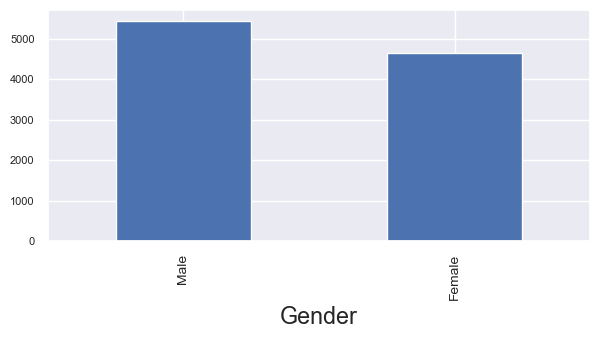

In [179]:
plt.figure(figsize=(7, 3))
df.groupby('Gender').ApplicantIncome.mean().sort_values(ascending=False).plot.bar() 

<AxesSubplot:xlabel='Married'>

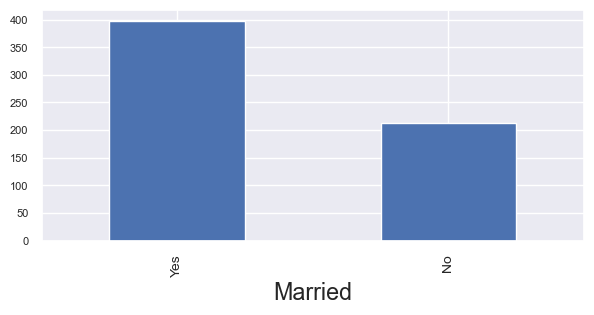

In [180]:
plt.figure(figsize=(7, 3))
df.groupby('Married').ApplicantIncome.count().sort_values(ascending=False).plot.bar()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

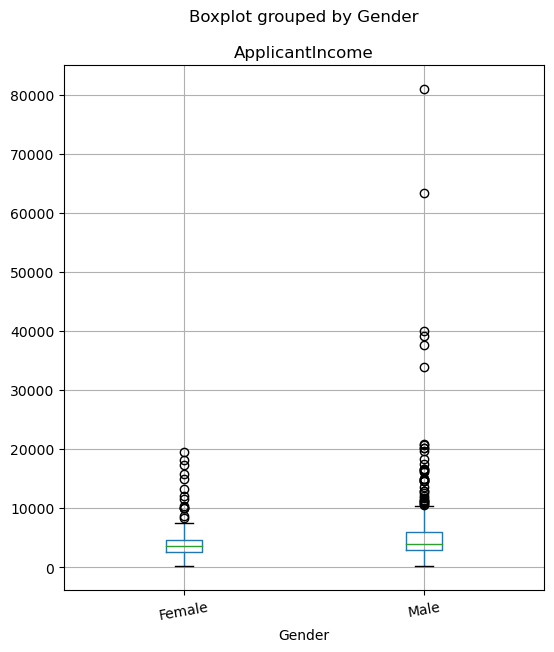

In [24]:
df_clean.boxplot('ApplicantIncome','Gender',rot = 10,figsize=(6,7))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Property_Area'>

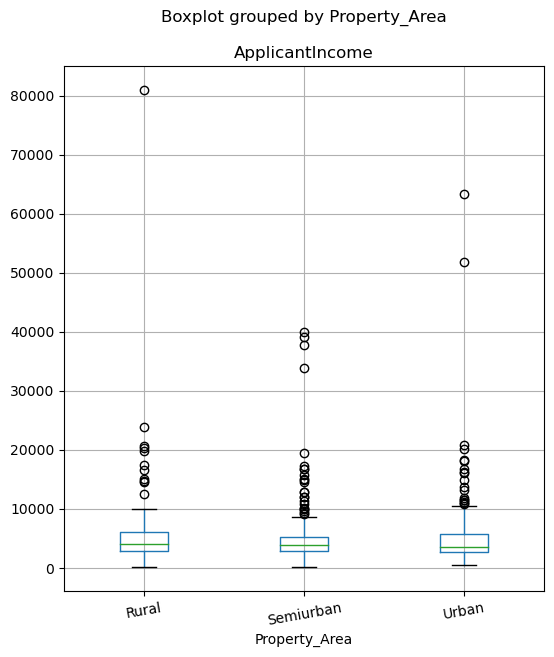

In [25]:
df_clean.boxplot('ApplicantIncome','Property_Area',rot = 10,figsize=(6,7))


Look at box plots to understand the distributions. 

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

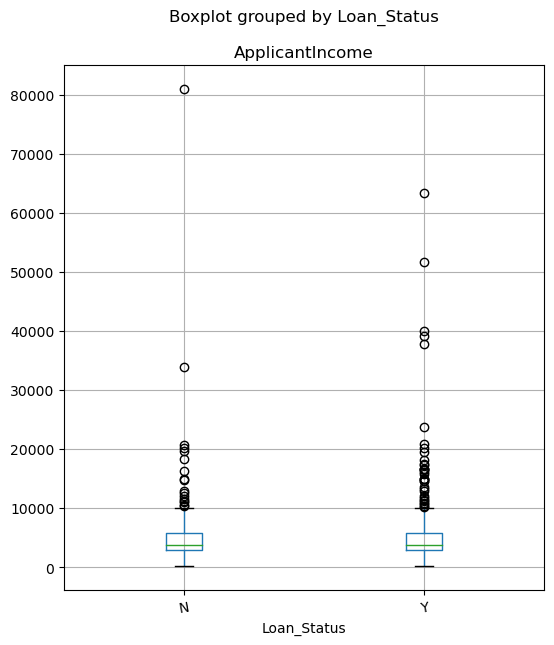

In [26]:
df_clean.boxplot('ApplicantIncome','Loan_Status',rot = 10,figsize=(6,7))

Look at the distribution of income segregated  by `Education`

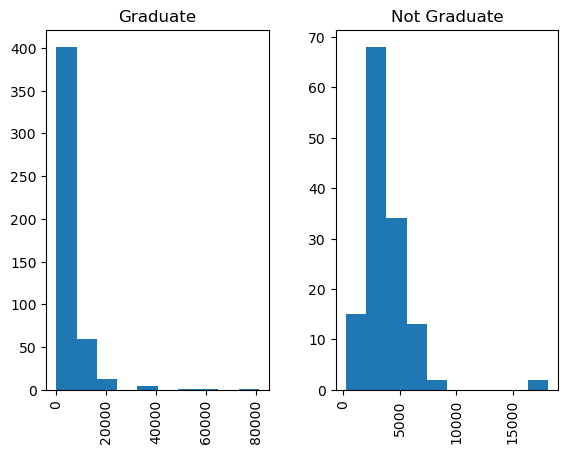

In [27]:
df_clean.hist(column='ApplicantIncome', by='Education');

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

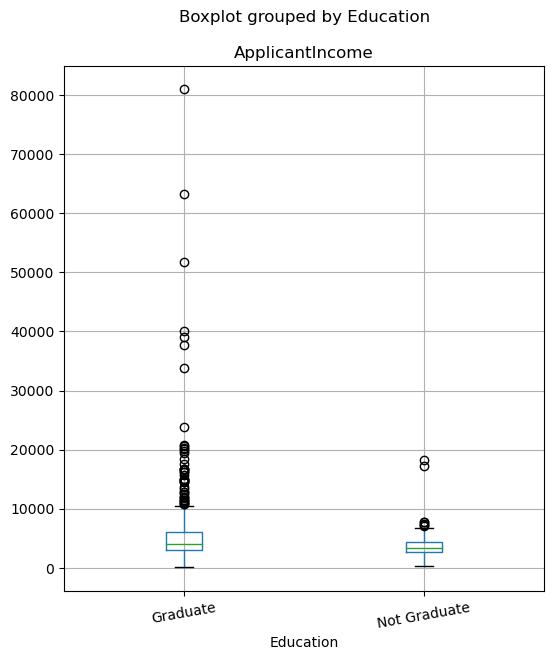

In [28]:
df_clean.boxplot('ApplicantIncome','Education',rot = 10,figsize=(6,7))

<AxesSubplot:>

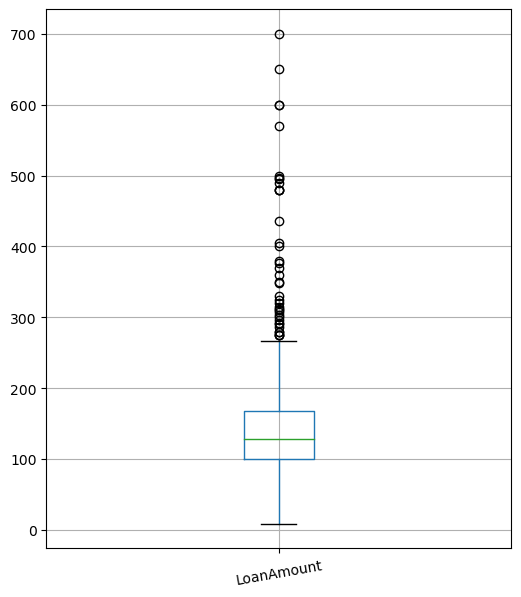

In [29]:
df_clean.boxplot('LoanAmount',rot = 10,figsize=(6,7))

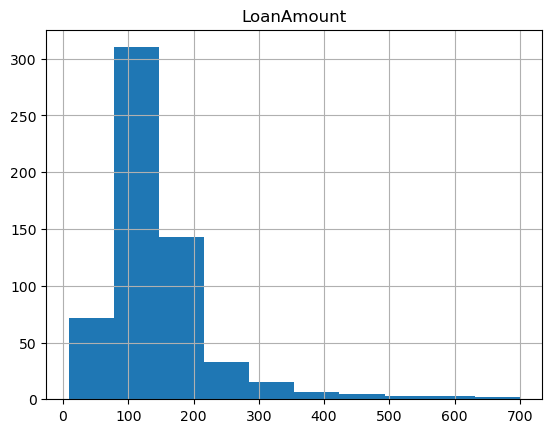

In [30]:
df_clean.hist(column='LoanAmount');

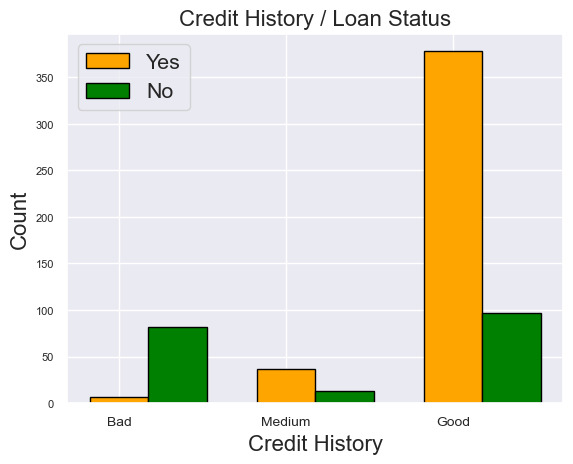

In [185]:
#Let's look at the relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='orange',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='green',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History / Loan Status',fontsize=16)
plt.legend(Loan_Status,loc=2)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [31]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [187]:
# Let's print out column with unique values
for col in df_clean.columns:
    if df_clean[col].dtypes == 'object':
        num_of_unique_cat = len (df_clean[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


In [32]:
pd.pivot_table(df_clean,index=["Gender", "Education", "Loan_Status", "Self_Employed"])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_11614/3582684805.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df_clean,index=["Gender", "Education", "Loan_Status", "Self_Employed"])


ApplicantIncome  \
Gender Education    Loan_Status Self_Employed                    
Female Graduate     N           No                 4056.250000   
                                Yes                6324.800000   
                    Y           No                 4397.862745   
                                Yes                9546.833333   
       Not Graduate N           No                 2941.000000   
                                Yes                3867.000000   
                    Y           No                 2894.555556   
                                Yes               14190.000000   
Male   Graduate     N           No                 6876.870588   
                                Yes                6980.285714   
                    Y           No                 5094.733032   
                                Yes                8173.111111   
       Not Graduate N           No                 3564.526316   
                                Yes                4148.833333   
                    Y           No                 3520.103448   
                                Yes                4441.285714   

                                               CoapplicantIncome  \
Gender Education    Loan_Status Self_Employed                      
Female Graduate     N           No                    651.750000   
                                Yes                   343.400000   
                    Y           No                    948.431373   
                                Yes                     0.000000   
       Not Graduate N           No                    647.400000   
                                Yes                     0.000000   
                    Y           No                    519.111111   
                                Yes                     0.000000   
Male   Graduate     N           No                   2196.882353   
                                Yes                  2584.857143   
                    Y           No                   1754.058461   
                                Yes                  1628.666667   
       Not Graduate N           No                   1333.894737   
                                Yes                  1525.500000   
                    Y           No                   1476.931034   
                                Yes                   886.857143   

                                               Credit_History  LoanAmount  \
Gender Education    Loan_Status Self_Employed                               
Female Graduate     N           No                   0.583333  118.125000   
                                Yes                  0.400000  163.400000   
                    Y           No                   0.977778  121.320000   
                                Yes                  1.000000  204.000000   
       Not Graduate N           No                   0.400000  108.500000   
                                Yes                  1.000000   62.000000   
                    Y           No                   1.000000  101.000000   
                                Yes                  1.000000  162.666667   
Male   Graduate     N           No                   0.575000  174.407407   
                                Yes                  0.500000  161.923077   
                    Y           No                   0.975728  146.395349   
                                Yes                  1.000000  187.285714   
       Not Graduate N           No                   0.472222  120.352941   
                                Yes                  0.600000  154.166667   
                    Y           No                   0.980392  115.642857   
                                Yes                  1.000000  116.285714   

                                               Loan_Amount_Term  
Gender Education    Loan_Status Self_Employed                    
Female Graduate     N           No                   356.500000  
                                Yes             

In [33]:
pd.pivot_table(df,index=["Gender","Education", "Loan_Status", "Self_Employed"],values=["ApplicantIncome"])

ApplicantIncome
Gender Education    Loan_Status Self_Employed                 
Female Graduate     N           No                 4056.250000
                                Yes                6324.800000
                    Y           No                 4397.862745
                                Yes                9546.833333
       Not Graduate N           No                 2941.000000
                                Yes                3867.000000
                    Y           No                 2894.555556
                                Yes               14190.000000
Male   Graduate     N           No                 6876.870588
                                Yes                6980.285714
                    Y           No                 5094.733032
                                Yes                8173.111111
       Not Graduate N           No                 3564.526316
                                Yes                4148.833333
                    Y           No                 3520.103448
                                Yes                4441.285714

In [34]:
pd.pivot_table(df_clean,index=["Property_Area", "Gender", "Loan_Status"],values=["ApplicantIncome"])

ApplicantIncome
Property_Area Gender Loan_Status                 
Rural         Female N                5090.900000
                     Y                3826.571429
              Male   N                6869.859649
                     Y                4976.627660
Semiurban     Female N                4056.692308
                     Y                5013.404762
              Male   N                5829.051282
                     Y                5290.390977
Urban         Female N                3409.571429
                     Y                5502.842105
              Male   N                4814.277778
                     Y                5473.285714

In [35]:
df_clean.pivot_table(index='Loan_Status', columns= ['Gender'])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_11614/14098341.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_clean.pivot_table(index='Loan_Status', columns= ['Gender'])


ApplicantIncome              CoapplicantIncome               \
Gender               Female         Male            Female         Male   
Loan_Status                                                               
N               4091.351351  5859.240000       1682.783784  1936.226667   
Y               4915.853333  5263.814159        824.453333  1657.403894   

            Credit_History            LoanAmount             Loan_Amount_Term  \
Gender              Female      Male      Female        Male           Female   
Loan_Status                                                                     
N                 0.555556  0.543478  128.694444  157.878571       351.000000   
Y                 0.984615  0.980831  125.712329  145.612121       352.931507   

                         
Gender             Male  
Loan_Status              
N            341.793103  
Y            338.738739

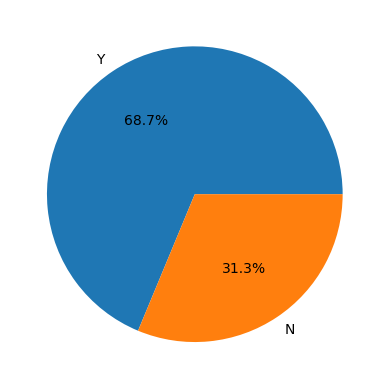

In [36]:
temp = df_clean['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


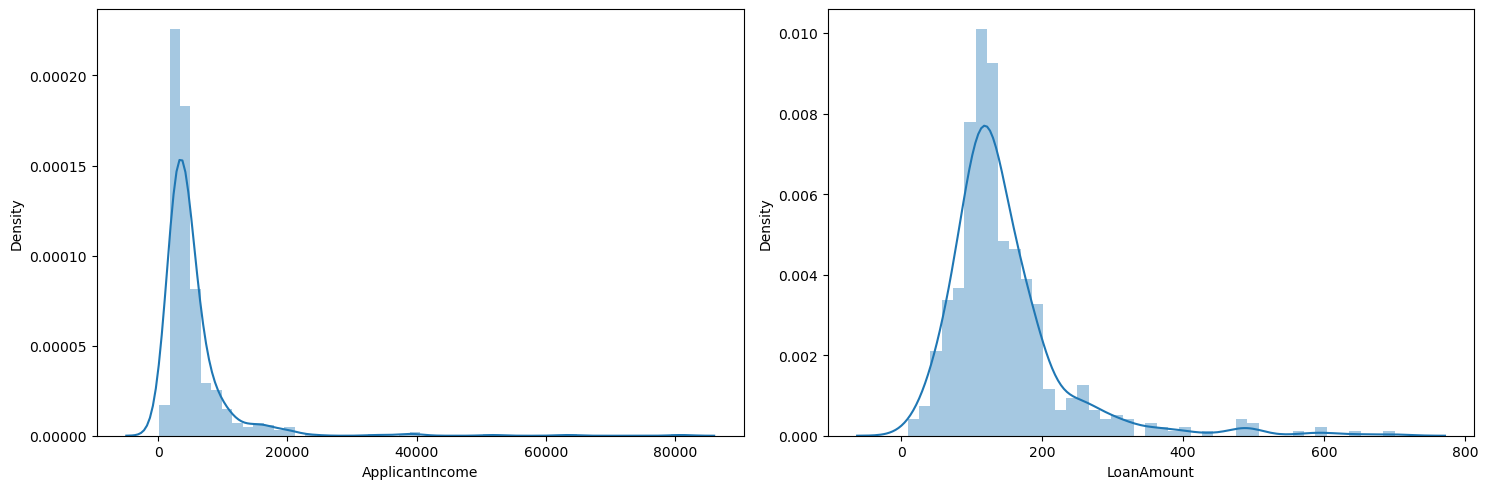

In [37]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


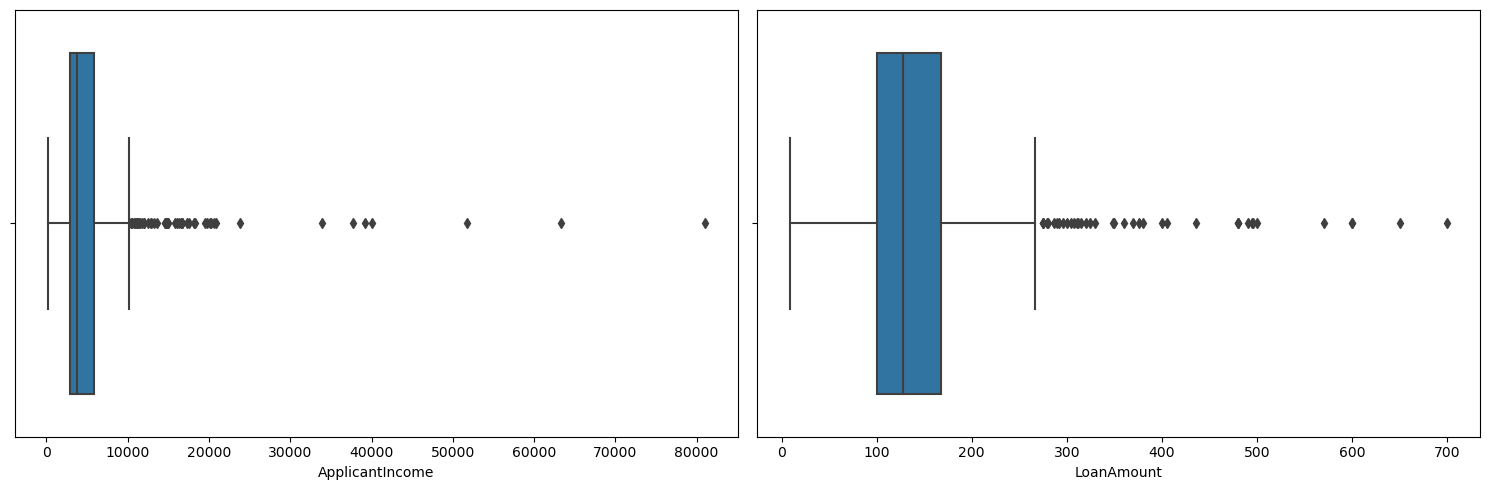

In [38]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [39]:
import seaborn as sns

/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

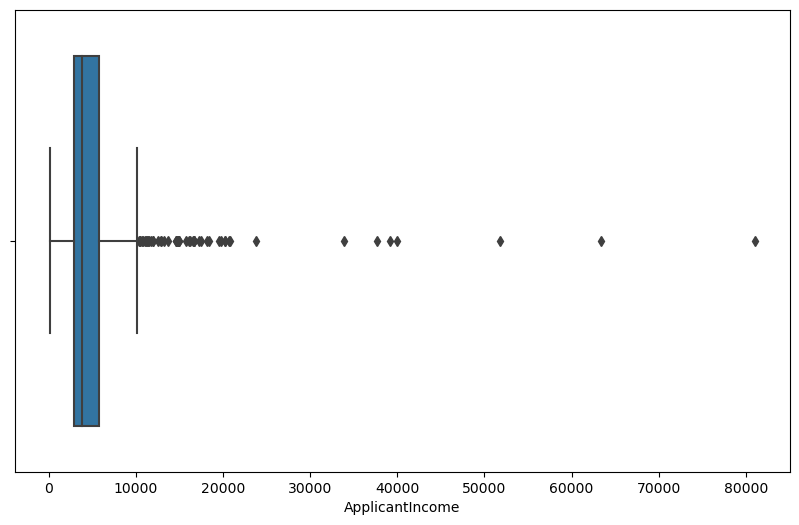

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df_clean.ApplicantIncome)

In [41]:
# Instantiate the appl_amnt:
appl_amnt = df_clean['ApplicantIncome']

# Define the quantiles of the appl_amnt distribution:
Q1 = appl_amnt.quantile(0.25)
Q3 = appl_amnt.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [42]:
df_clean_income = df_clean[~((appl_amnt < min_threshold)|(appl_amnt > max_threshold))]
df_clean_income.shape

(564, 13)

<AxesSubplot:xlabel='ApplicantIncome'>

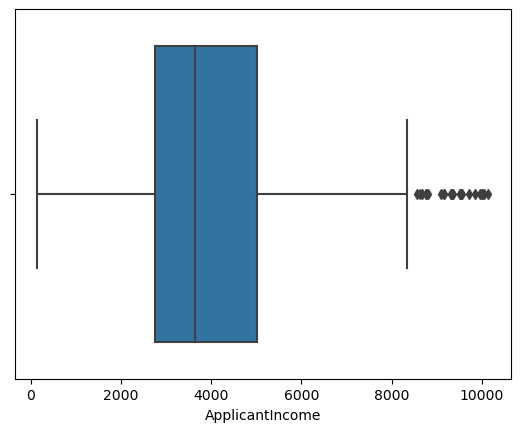

In [43]:
sns.boxplot(x=df_clean_income['ApplicantIncome'])


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

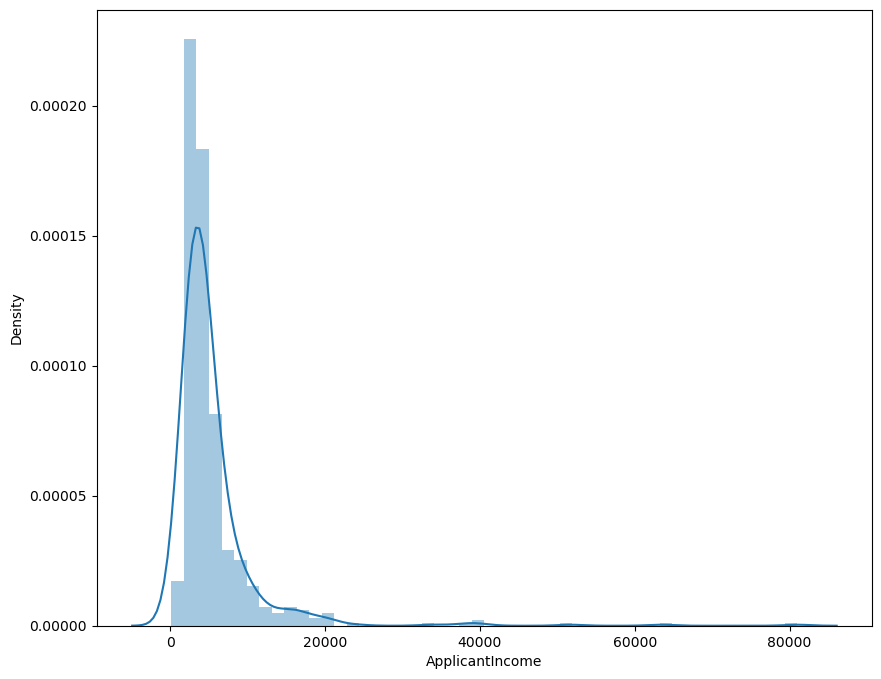

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df_clean.ApplicantIncome)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [45]:
df_clean['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df_clean['Loan_Amount_Term'].mode()[0])
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

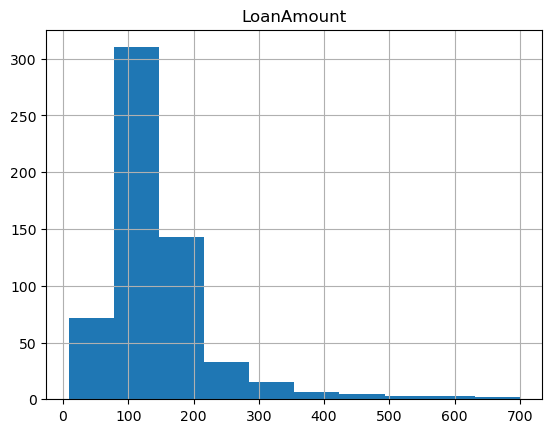

In [46]:
#LOanAmount Histogram before getting rid of extreme values
df_clean.hist(column='LoanAmount')

In [47]:
# Instantiate the Loan_Amount:
loan_amount = df_clean['LoanAmount']

# Define the quantiles of the loan_amount distribution:
Q1 = loan_amount.quantile(0.25)
Q3 = loan_amount.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [48]:
df_clean_loan = df_clean[~((loan_amount < min_threshold)|(loan_amount > max_threshold))]
df_clean_loan.shape

(575, 13)

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

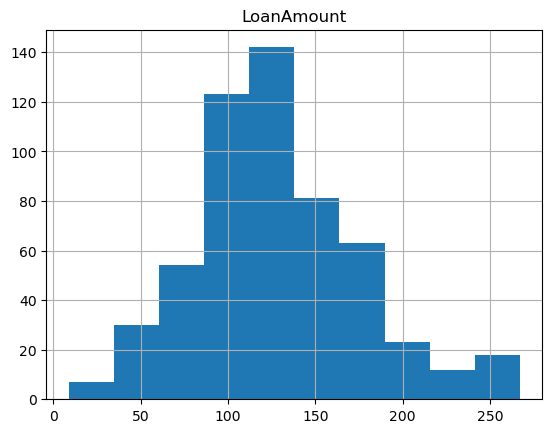

In [49]:
df_clean_loan.hist(column='LoanAmount')

<AxesSubplot:xlabel='LoanAmount'>

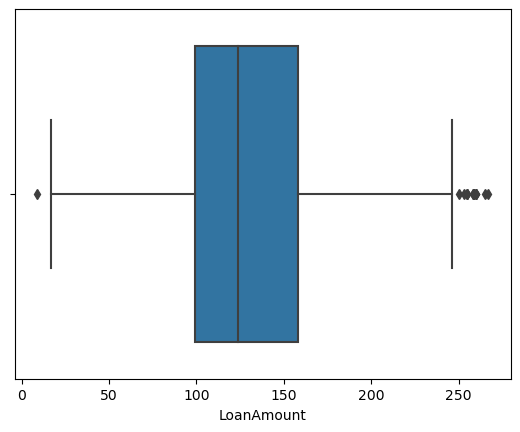

In [50]:
sns.boxplot(x=df_clean_loan['LoanAmount'])


Combine both incomes as total income and take a log transformation of the same.

In [51]:
# Create new column of a combined income: CombinedIncome
df_clean['CombinedIncome'] = df_clean.apply(lambda x: x['ApplicantIncome'] + x['CoapplicantIncome'], axis=1)
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CombinedIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


array([[<AxesSubplot:title={'center':'CombinedIncome'}>]], dtype=object)

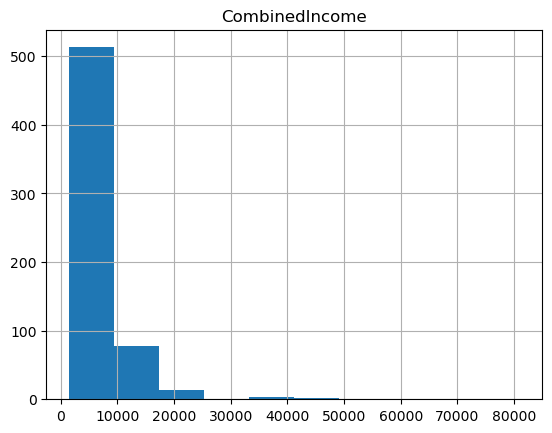

In [52]:
df_clean.hist(column='CombinedIncome')

In [53]:
# Instantiate the Loan_Amount:
combined_amount = df_clean['CombinedIncome']

# Define the quantiles of the combined_amount distribution:
Q1 = combined_amount.quantile(0.25)
Q3 = combined_amount .quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [54]:
df_clean_comb_inc = df_clean[~((combined_amount < min_threshold)|(combined_amount > max_threshold))]
df_clean_comb_inc.shape

(564, 14)

array([[<AxesSubplot:title={'center':'CombinedIncome'}>]], dtype=object)

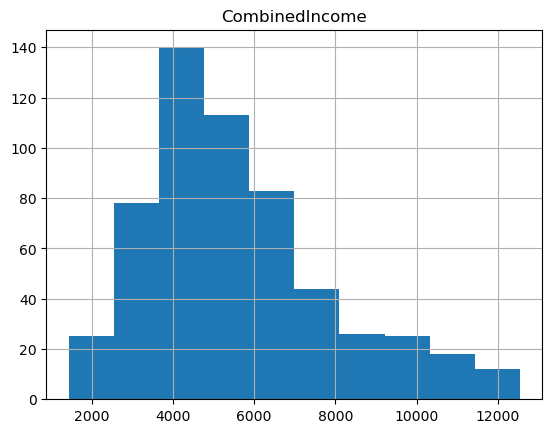

In [55]:
df_clean_comb_inc.hist(column='CombinedIncome')

Text(0.5, 1.0, 'Log-Transformed Data')

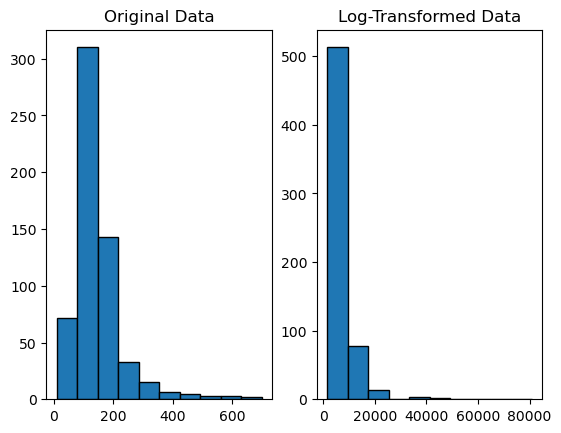

In [56]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(loan_amount, edgecolor='black')
axs[1].hist(combined_amount, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

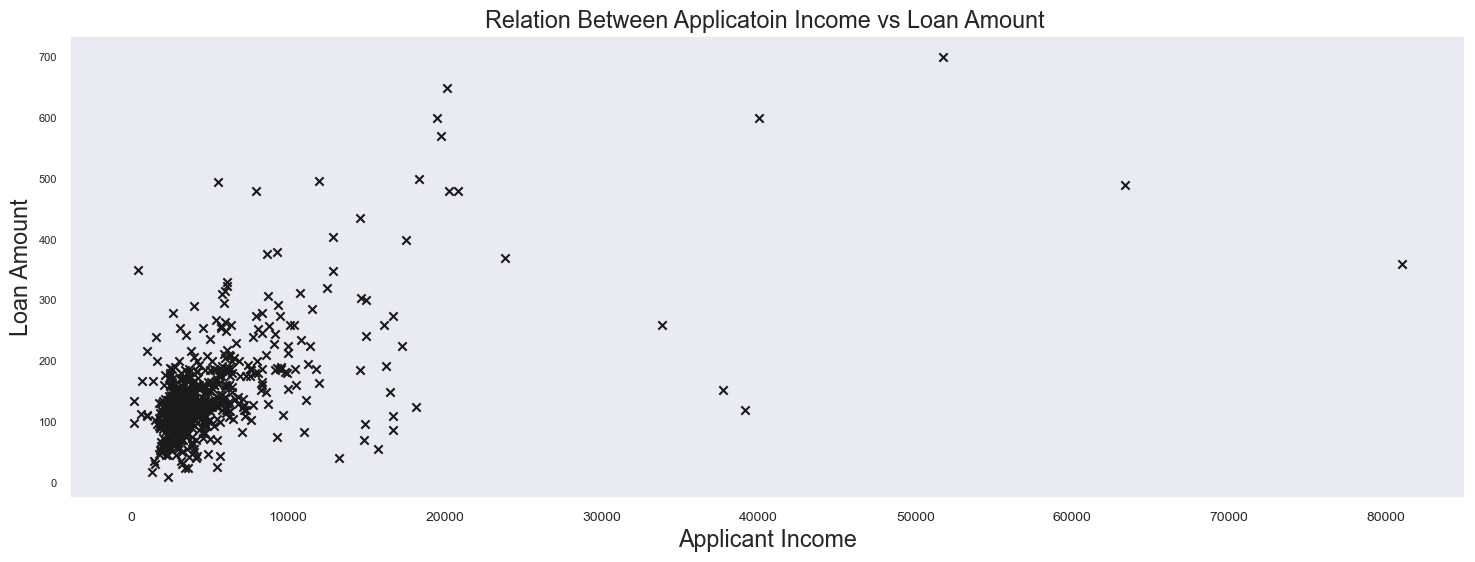

In [190]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df_clean['ApplicantIncome'] , df_clean['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_11614/3370513180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


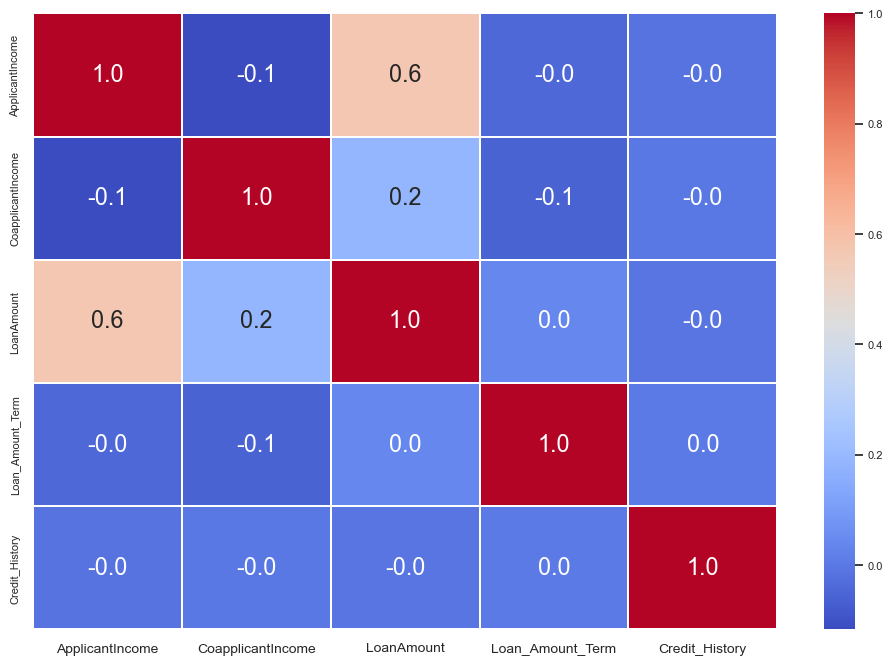

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## 4. Building a Predictive Model

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import plotly.express as px
import datetime
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [193]:
df_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Logistic regression


In [194]:
train_data = pd.read_csv("/Users/tativalentine/Documents/GitHub/deployment-project/data.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [195]:
# Data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [196]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [197]:
train_data.loc[train_data.Loan_Status=='N','Loan_Status']= 0
train_data.loc[train_data.Loan_Status=='Y','Loan_Status']=1

In [198]:
train_data.loc[train_data.Gender=='Male','Gender']= 0
train_data.loc[train_data.Gender=='Female','Gender']=1

In [199]:
train_data.loc[train_data.Married=='No','Married']= 0
train_data.loc[train_data.Married=='Yes','Married']=1

In [200]:
train_data.loc[train_data.Education=='Graduate','Education']= 0
train_data.loc[train_data.Education=='Not Graduate','Education']=1

In [201]:
train_data.loc[train_data.Self_Employed=='No','Self_Employed']= 0
train_data.loc[train_data.Self_Employed=='Yes','Self_Employed']=1

In [202]:
train_data.loc[train_data.Dependents=='No','Dependents']= 0
train_data.loc[train_data.Dependents=='Yes','Dependents']=1

In [203]:
train_data = train_data.replace(['3+'], '1')

In [204]:
property_area= pd.get_dummies(train_data['Property_Area'],drop_first=True)

In [205]:
train_data= pd.concat([train_data,property_area],axis=1)

In [206]:
train_data= pd.concat([train_data,property_area],axis=1)

Try paramater grid search to improve the results

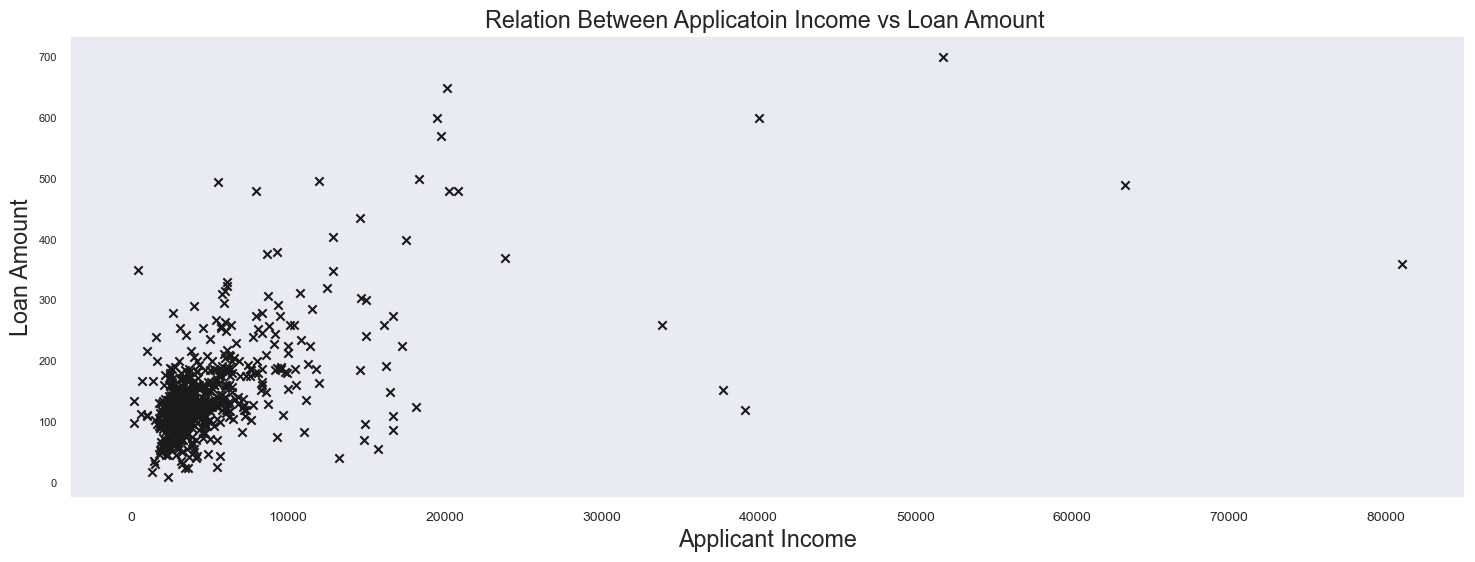

In [207]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df_clean['ApplicantIncome'] , df_clean['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [208]:
#Let’s see the mean amount of the loan granted to males as well as females.
df_clean.groupby('Gender').mean()['LoanAmount']

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_11614/12293196.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('Gender').mean()['LoanAmount']


Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

In [209]:
#The loan amount requested by males is higher than what is requested by females.

df_clean.groupby(['Married', 'Gender']).mean()['LoanAmount']

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_11614/2041775756.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby(['Married', 'Gender']).mean()['LoanAmount']


Married  Gender
No       Female    116.115385
         Male      136.088000
Yes      Female    153.322581
         Male      154.011662
Name: LoanAmount, dtype: float64

Married people requested loan amount is generally higher than the unmarried. This may be one of the reason’s that the chances of getting loan approval for a married person are lower than an unmarried person.

# Predict the Model

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
df_2 = train_data.fillna(0)

In [212]:
X= df_2.drop(['Loan_ID','Property_Area','Loan_Status'],axis=1)
y = df_2['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
logmodel = LogisticRegression()

In [215]:
logmodel.fit(X_train,y_train)

LogisticRegression()

# Accuracy of Model

In [216]:
from sklearn.metrics import classification_report

In [217]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        33
           1       0.83      0.91      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.70      0.71       123
weighted avg       0.78      0.80      0.79       123



# Grid search to improve results

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Create a classifier object with the classifier and parameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 5, 8, 10, 12, 15, 20],
    'n_estimators': [1, 2, 3, 4, 5, 6, 7]
}

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10, 12, 15, 20],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7]})

In [219]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [220]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.7239057239057239

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
#used for estimating model accuracy and getting reports
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [222]:
df_2.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban,Semiurban,Urban
0,LP001002,0.0,0.0,0,0,0.0,5849,0.0,0.0,360.0,1.0,Urban,1,0,1,0,1
1,LP001003,0.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0,0,0


In [223]:
#Separate target from predictors and encode target with LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
X =df.drop(['Loan_ID','Loan_Status'], axis=1) # drop the column not required

y = LabelEncoder().fit_transform(df.Loan_Status)

#train-test split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [224]:
#Get number and cat columns for the preprocessor (cells below)
num_cols = [col for col in train_X.columns if train_X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in train_X.columns if train_X[col].dtype=='object']

In [225]:
# create pipeline

num_transform = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transform = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#the preprocessor is a column transformer that performs the adquate transofrmations 
#depending on the column type (numerical or categorical)
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, num_cols),
    ('cat', cat_transform, cat_cols)
])


df_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=800))
])

In [226]:
df_pipeline.fit(train_X, train_y)
preds = df_pipeline.predict(valid_X)
print(accuracy_score(valid_y, preds))
print(classification_report(valid_y, preds))

0.8373983739837398
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [227]:
valid_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             122 non-null    object 
 1   Married            123 non-null    object 
 2   Dependents         123 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      119 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         121 non-null    float64
 8   Loan_Amount_Term   120 non-null    float64
 9   Credit_History     114 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 11.5+ KB


In [228]:
score = cross_val_score(df_pipeline, df, y, cv=7, scoring='accuracy')
print('The mean of the scores of 7-fold cross validation is ', score.mean())

The mean of the scores of 7-fold cross validation is  0.807900432900433


In [229]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [230]:
# Saving the model
import pickle

# saving the columns
model_columns = list(valid_X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)
    
    
pickle.dump(df_pipeline, open('df_pipeline.pkl', 'wb'))

In [231]:
model

LogisticRegression()

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import FeatureUnion

In [92]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CombinedIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [93]:
# Create target variable
y = df["Loan_Status"]
X = df.drop(["Loan_Status","Loan_ID"],axis = 1)

In [94]:
# Spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
X_train.isnull().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     10
Credit_History       32
Property_Area         0
dtype: int64

In [96]:
#Splitting num/categorical features
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [97]:
#Replacing all NULL values
X_train.isna().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     10
Credit_History       32
Property_Area         0
dtype: int64

In [98]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self
    
to_dense = ToDenseTransformer()

In [99]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
selection = SelectKBest(k=3)
pca = PCA(n_components=3)

In [102]:
from sklearn.compose import ColumnTransformer

# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', pca)
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=False))
])

# Define numerical pipeline
num_pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']),
     ('num1', num_pipe1, ['Loan_Amount_Term'])
])

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
log_reg = LogisticRegression()

In [104]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('rfc', rfc)])

In [105]:
model.fit(X_train,y_train)

/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=3))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                        

In [106]:
# Now let's make predictions
y_pred = model.predict(X_test)

In [107]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.7135135135135136


array([[ 19,  45],
       [  8, 113]])

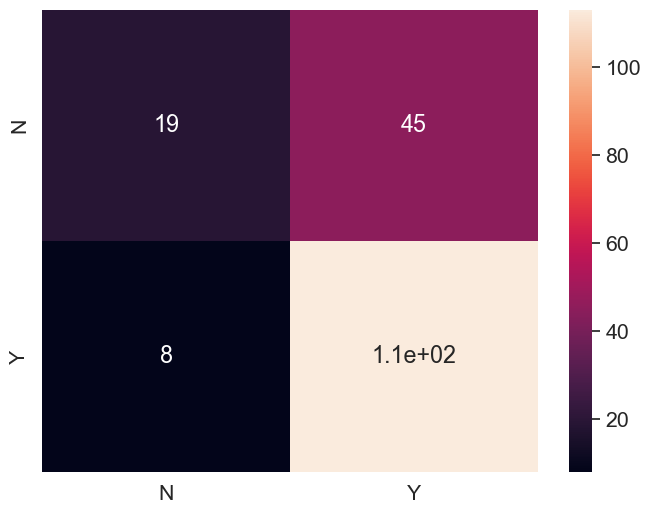

In [108]:
df_cm = pd.DataFrame(cnf_matrix, index = ['N', 'Y'],
                  columns = ['N', 'Y'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True)
plt.show()

# GRID SEARCH

In [109]:
from sklearn.model_selection import GridSearchCV
# set up our parameters grid
param_grid = {"preprocessor__cat__pca__n_components": [2, 3, 4],
                  "rfc__max_depth":[2, 3, 5, 6, 8]}

# create a Grid Search object
grid_search = GridSearchCV(model, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...
[CV 1/5; 1/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=2;, score=0.691 total time=   0.1s
[CV 2/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...
[CV 2/5; 1/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=2;, score=0.699 total time=   0.1s
[CV 3/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 3/5; 1/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 4/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...
[CV 4/5; 1/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 5/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...
[CV 5/5; 1/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=2;, score=0.689 total time=   0.1s
[CV 1/5; 2/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=3...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 1/5; 2/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=3;, score=0.691 total time=   0.1s
[CV 2/5; 2/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=3...
[CV 2/5; 2/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=3;, score=0.707 total time=   0.1s
[CV 3/5; 2/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=3...
[CV 3/5; 2/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=3;, score=0.683 total time=   0.1s
[CV 4/5; 2/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=3...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 4/5; 2/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=3;, score=0.699 total time=   0.1s
[CV 5/5; 2/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=3...
[CV 5/5; 2/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=3;, score=0.697 total time=   0.1s
[CV 1/5; 3/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=5...
[CV 1/5; 3/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=5;, score=0.715 total time=   0.1s
[CV 2/5; 3/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=5...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 2/5; 3/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 3/5; 3/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=5...
[CV 3/5; 3/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 4/5; 3/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=5...
[CV 4/5; 3/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 5/5; 3/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=5...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 5/5; 3/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=5;, score=0.705 total time=   0.1s
[CV 1/5; 4/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=6...
[CV 1/5; 4/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=6;, score=0.724 total time=   0.1s
[CV 2/5; 4/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=6...
[CV 2/5; 4/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=6;, score=0.691 total time=   0.1s
[CV 3/5; 4/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=6...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 3/5; 4/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=6;, score=0.683 total time=   0.1s
[CV 4/5; 4/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=6...
[CV 4/5; 4/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=6;, score=0.659 total time=   0.1s
[CV 5/5; 4/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=6...
[CV 5/5; 4/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=6;, score=0.721 total time=   0.1s
[CV 1/5; 5/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=8...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 1/5; 5/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=8;, score=0.732 total time=   0.1s
[CV 2/5; 5/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=8...
[CV 2/5; 5/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=8;, score=0.699 total time=   0.1s
[CV 3/5; 5/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=8...
[CV 3/5; 5/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=8;, score=0.699 total time=   0.1s
[CV 4/5; 5/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=8...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 4/5; 5/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=8;, score=0.683 total time=   0.1s
[CV 5/5; 5/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=8...
[CV 5/5; 5/15] END preprocessor__cat__pca__n_components=2, rfc__max_depth=8;, score=0.721 total time=   0.1s
[CV 1/5; 6/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=2...
[CV 1/5; 6/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=2;, score=0.691 total time=   0.1s
[CV 2/5; 6/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=2...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 2/5; 6/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=2;, score=0.699 total time=   0.1s
[CV 3/5; 6/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=2...
[CV 3/5; 6/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 4/5; 6/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=2...
[CV 4/5; 6/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 5/5; 6/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=2...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 5/5; 6/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=2;, score=0.705 total time=   0.1s
[CV 1/5; 7/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=3...
[CV 1/5; 7/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=3;, score=0.715 total time=   0.1s
[CV 2/5; 7/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=3...
[CV 2/5; 7/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=3;, score=0.699 total time=   0.1s
[CV 3/5; 7/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=3...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 3/5; 7/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=3;, score=0.683 total time=   0.1s
[CV 4/5; 7/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=3...
[CV 4/5; 7/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=3;, score=0.699 total time=   0.1s
[CV 5/5; 7/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=3...
[CV 5/5; 7/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=3;, score=0.705 total time=   0.1s
[CV 1/5; 8/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=5...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 1/5; 8/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=5;, score=0.699 total time=   0.1s
[CV 2/5; 8/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=5...
[CV 2/5; 8/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 3/5; 8/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=5...
[CV 3/5; 8/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 4/5; 8/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=5...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 4/5; 8/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=5;, score=0.683 total time=   0.1s
[CV 5/5; 8/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=5...
[CV 5/5; 8/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=5;, score=0.779 total time=   0.1s
[CV 1/5; 9/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=6...
[CV 1/5; 9/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=6;, score=0.699 total time=   0.1s
[CV 2/5; 9/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=6...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 2/5; 9/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=6;, score=0.707 total time=   0.1s
[CV 3/5; 9/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=6...
[CV 3/5; 9/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=6;, score=0.715 total time=   0.1s
[CV 4/5; 9/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=6...
[CV 4/5; 9/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=6;, score=0.683 total time=   0.1s
[CV 5/5; 9/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=6...


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 5/5; 9/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=6;, score=0.787 total time=   0.1s
[CV 1/5; 10/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=8..
[CV 1/5; 10/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=8;, score=0.740 total time=   0.1s
[CV 2/5; 10/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=8..
[CV 2/5; 10/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=8;, score=0.707 total time=   0.1s
[CV 3/5; 10/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=8..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 3/5; 10/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=8;, score=0.740 total time=   0.1s
[CV 4/5; 10/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=8..
[CV 4/5; 10/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=8;, score=0.683 total time=   0.1s
[CV 5/5; 10/15] START preprocessor__cat__pca__n_components=3, rfc__max_depth=8..
[CV 5/5; 10/15] END preprocessor__cat__pca__n_components=3, rfc__max_depth=8;, score=0.795 total time=   0.1s
[CV 1/5; 11/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=2..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 1/5; 11/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=2;, score=0.691 total time=   0.1s
[CV 2/5; 11/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=2..
[CV 2/5; 11/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=2;, score=0.699 total time=   0.1s
[CV 3/5; 11/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=2..
[CV 3/5; 11/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 4/5; 11/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=2..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 4/5; 11/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=2;, score=0.683 total time=   0.1s
[CV 5/5; 11/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=2..
[CV 5/5; 11/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=2;, score=0.689 total time=   0.1s
[CV 1/5; 12/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=3..
[CV 1/5; 12/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=3;, score=0.707 total time=   0.1s
[CV 2/5; 12/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=3..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 2/5; 12/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=3;, score=0.707 total time=   0.1s
[CV 3/5; 12/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=3..
[CV 3/5; 12/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=3;, score=0.683 total time=   0.1s
[CV 4/5; 12/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=3..
[CV 4/5; 12/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=3;, score=0.691 total time=   0.1s
[CV 5/5; 12/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=3..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 5/5; 12/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=3;, score=0.721 total time=   0.1s
[CV 1/5; 13/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=5..
[CV 1/5; 13/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=5;, score=0.707 total time=   0.1s
[CV 2/5; 13/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=5..
[CV 2/5; 13/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=5;, score=0.707 total time=   0.1s
[CV 3/5; 13/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=5..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 3/5; 13/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=5;, score=0.691 total time=   0.1s
[CV 4/5; 13/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=5..
[CV 4/5; 13/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=5;, score=0.699 total time=   0.1s
[CV 5/5; 13/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=5..
[CV 5/5; 13/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=5;, score=0.770 total time=   0.1s
[CV 1/5; 14/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=6..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 1/5; 14/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=6;, score=0.732 total time=   0.1s
[CV 2/5; 14/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=6..
[CV 2/5; 14/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=6;, score=0.699 total time=   0.1s
[CV 3/5; 14/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=6..
[CV 3/5; 14/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=6;, score=0.715 total time=   0.1s
[CV 4/5; 14/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=6..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 4/5; 14/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=6;, score=0.675 total time=   0.1s
[CV 5/5; 14/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=6..
[CV 5/5; 14/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=6;, score=0.754 total time=   0.1s
[CV 1/5; 15/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=8..
[CV 1/5; 15/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=8;, score=0.772 total time=   0.1s
[CV 2/5; 15/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=8..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 2/5; 15/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=8;, score=0.715 total time=   0.1s
[CV 3/5; 15/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=8..
[CV 3/5; 15/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=8;, score=0.740 total time=   0.1s
[CV 4/5; 15/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=8..
[CV 4/5; 15/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=8;, score=0.683 total time=   0.1s
[CV 5/5; 15/15] START preprocessor__cat__pca__n_components=4, rfc__max_depth=8..


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

[CV 5/5; 15/15] END preprocessor__cat__pca__n_components=4, rfc__max_depth=8;, score=0.779 total time=   0.1s


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('pca',
                                                          

In [121]:
print(grid_search.best_params_)

{'preprocessor__cat__pca__n_components': 4, 'rfc__max_depth': 8}


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [117]:
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

import pickle

In [127]:
pickle.dump( grid_search, open( "model.p", "wb" ) )

In [167]:
from flask import Flask, request
import pickle

app = Flask(__name__)

# Load the trained model from a file
model = pickle.load(open("model.pkl", "rb"))

@app.route("/predict", methods=["POST"])
def predict():
    # Get the data from the request
    data = request.get_json()
    
    # Use the model to make a prediction
    prediction = model.predict(data)
    
    # Return the prediction as a response
    return {"prediction": prediction}

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
